# plynomial linear regression

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns


In [122]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)

In [123]:
import matplotlib.pyplot as plt

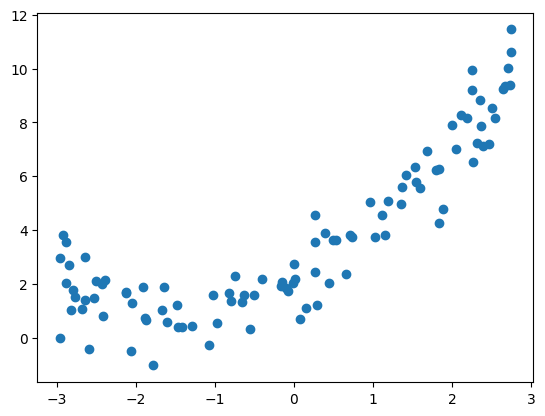

In [124]:
plt.scatter(x,y)

In [125]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [127]:
lr.fit(x_train,y_train)

LinearRegression()

In [128]:
ypred=lr.predict(x_test)

In [129]:
from sklearn.metrics import r2_score


In [130]:
r2_score(y_test,ypred)

0.6562105200356745

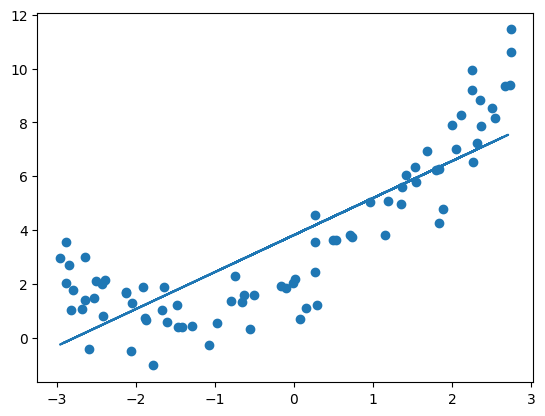

In [131]:
plt.plot(x_test,ypred)
plt.scatter(x_train,y_train)

In [132]:
###lets apply polinomial tranformation
from sklearn.preprocessing import PolynomialFeatures

In [133]:
ploy=PolynomialFeatures(degree=2,include_bias=True)

In [134]:
x_train_poy=ploy.fit_transform(x_train)
x_test_poly=ploy.transform(x_test)

In [135]:
from sklearn.metrics import r2_score
ploy_reg=LinearRegression()
ploy_reg.fit(x_train_poy,y_train)


LinearRegression()

In [136]:
y_pred=ploy_reg.predict(x_test_poly)

In [137]:
r2_score(y_test,y_pred)### now the score has improved

0.8863606752438082

In [ ]:
plt.scatter(x_train,ploy_reg.predict(x_test_poly))

In [ ]:
x_train.shape


(80, 3)

# simple linear regression

import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


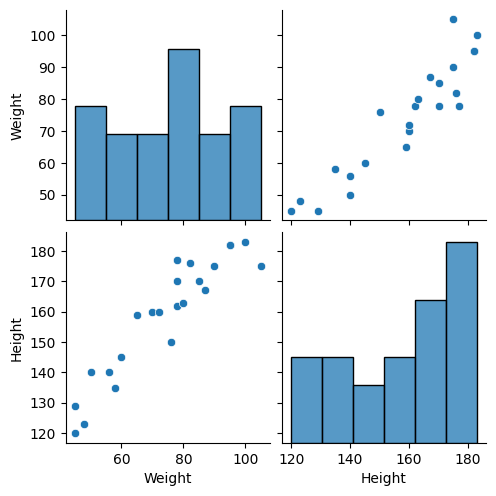

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [ ]:
df.shape

(23, 2)

In [ ]:
# spliting independent and dependent features
x=df[['Weight']] ### keep inout features as data frame
y=df['Height']## it can be kept as data frame most suitable is series

In [ ]:
x.shape
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
y.shape

(23,)

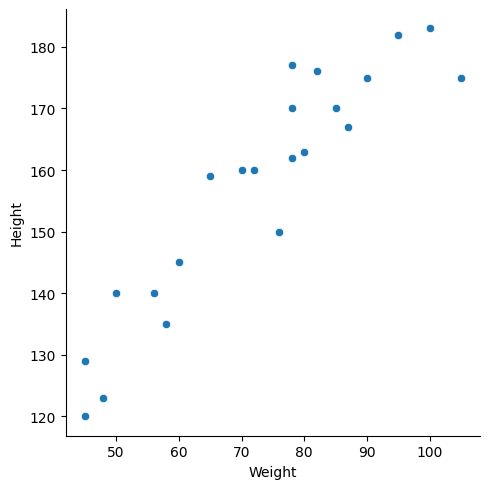

In [ ]:
sns.relplot(df,x='Weight',y='Height',kind='scatter')

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


In [ ]:
## standarsization Scalling the input features (making all input value in S.D=1,MEAN=0)
## we are the scaling the output featues because in gradient descent only input will converges or gradient descent is applied on to independent features

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [ ]:
x_train=scaler.fit_transform(x_train)## only calulate fit_transform for this x_tain data
# not for x_train data because the z calulated in fit_tranform is applied to the xtest also hence only transfrom(xtest)// it use the same sd and mean calulated in fit_transform(x_train)

## beacause there is aconcept called data leckage 
### i dont want my training data to know any info about the test data

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([17.2982057])

In [ ]:
lr.intercept_

156.47058823529412

In [ ]:
y_pred=lr.predict(x_test)

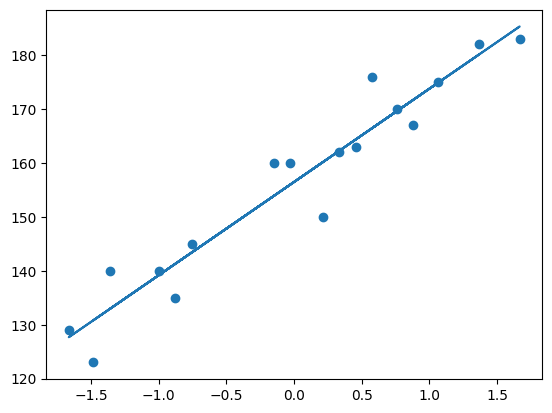

In [ ]:
### plot training data plot best fit line
plt.scatter(x_train,y_train)
# plt.plot(x_test,y_pred)
plt.plot(x_train,lr.predict(x_train))

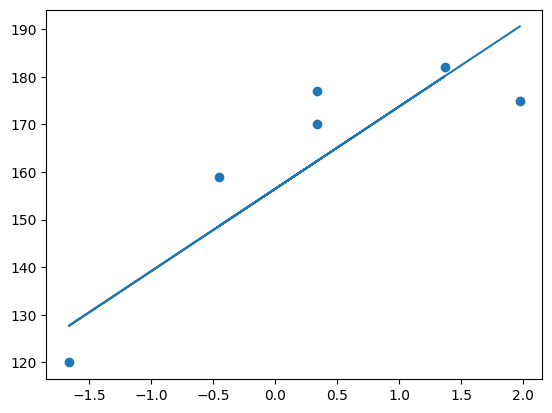

In [ ]:
## test data plot
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [ ]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [ ]:
### performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
Mse=mean_squared_error(y_test,y_pred)
Mse

114.84069295228699

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

9.66512588679501

In [ ]:
rmse=np.sqrt(Mse)
rmse

10.716374991212605

In [ ]:
score=r2_score(y_test,y_pred)
score

0.7360826717981276

In [ ]:
## adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [ ]:
!pip3 install startsmodel

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement startsmodel (from versions: none)
ERROR: No matching distribution found for startsmodel


In [ ]:
## ols implementation
import startsmodel.api as sm
model=sm.OLS(y_train,x_train).fit()

In [ ]:
prediction=model.predict(x_test)
print(model.summary())

In [ ]:
## prediction for new data 72 weight
lr.predict(scaler.transform([[100]]))

array([1886.29115867])

In [ ]:
lr.predict([[100]])

array([1886.29115867])

In [ ]:
scaler.transform([[72]])

array([[72.]])

In [ ]:
scaler.transform([[20]])

array([[20.]])